In [99]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

data40 = pd.read_csv('data40.csv')
# data40 = data40.reset_index()
# # print(data40)
# print(data40.iloc[2:, 20:1])
total_data = data40.iloc[2:, 19:-1]
total_data = total_data.reset_index(drop=True)# reset index
# print(total_data)
# total_data = total_data.reset_index(drop=False) # reset index
total_data = total_data.astype(dtype='int64') # To int


# df = pd.melt(total_data, id_vars='')

total_data_np = total_data.values
total_data_np = total_data_np.astype(np.int64)
print(total_data_np)

[[4 3 5 ... 3 5 4]
 [2 4 5 ... 2 2 1]
 [3 1 4 ... 1 2 4]
 ...
 [1 1 5 ... 1 1 5]
 [1 1 6 ... 1 1 3]
 [1 1 6 ... 2 1 3]]


In [93]:
print('The rotation is:')
print(' 1 - 怒り - anger,\n 2 - 恐怖 - fear,\n 3 - 幸福 - happiness, \n 4 - 悲しみ - sadness, \n 5 - 驚き - surprise,\n 6 - 嫌悪 - disgust, \n 7 - 中性 - neutral')

The rotation is:
 1 - 怒り - anger,
 2 - 恐怖 - fear,
 3 - 幸福 - happiness, 
 4 - 悲しみ - sadness, 
 5 - 驚き - surprise,
 6 - 嫌悪 - disgust, 
 7 - 中性 - neutral


# Analysis 2

In [2]:
!pwd

/Users/dongshengyang/Downloads/iMacResearch/github/CameraControl


In [81]:
import os
import pandas as pd

# Py-feat data
# namba_nor_rating
BOA_final_select = {}
BOA_final_select['anger'] = [[0, '2021_12_23_15_32_12_anger_772.csv'], [3, '2021_12_23_15_27_09_anger_212.csv'], [5, '2021_12_23_15_31_17_anger_672.csv'], [8, '2021_12_23_15_30_17_anger_562.csv'], [9, '2021_12_23_15_33_23_anger_902.csv']]
BOA_final_select['disgust'] = [[0, '2021_12_23_15_42_21_disgust_822.csv'], [2, '2021_12_23_15_36_37_disgust_182.csv'], [7, '2021_12_23_15_42_43_disgust_862.csv'], [8, '2021_12_23_15_36_58_disgust_222.csv'], [9, '2021_12_23_15_36_16_disgust_142.csv']]
BOA_final_select['fear'] = [[0, '2021_12_23_15_50_44_fear_792.csv'], [3, '2021_12_23_15_46_42_fear_322.csv'], [5, '2021_12_23_15_50_03_fear_712.csv'], [6, '2021_12_23_15_52_23_fear_982.csv'], [9, '2021_12_23_15_51_09_fear_842.csv']]
BOA_final_select['happiness'] = [[0, '2021_12_23_16_02_49_happiness_982.csv'], [2, '2021_12_23_15_56_09_happiness_242.csv'], [5, '2021_12_23_15_57_14_happiness_362.csv'], [7, '2021_12_23_16_01_09_happiness_792.csv'], [9, '2021_12_23_16_01_03_happiness_782.csv']]
BOA_final_select['sadness'] = [[0, '2021_12_23_16_08_31_sadness_622.csv'], [1, '2021_12_23_16_10_19_sadness_822.csv'], [2, '2021_12_23_16_09_41_sadness_752.csv'], [3, '2021_12_23_16_11_40_sadness_972.csv'], [6, '2021_12_23_16_10_03_sadness_792.csv']]
BOA_final_select['surprise'] = [[0, '2021_12_23_16_16_59_surprise_422.csv'], [1, '2021_12_23_16_21_15_surprise_862.csv'], [4, '2021_12_23_16_19_35_surprise_692.csv'], [7, '2021_12_23_16_20_33_surprise_792.csv'], [8, '2021_12_23_16_21_09_surprise_852.csv']]
BOA_final_select['neutral'] =  [[0, '2021_12_23_16_55_37_neutral_762.csv'], [2, '2021_12_23_16_55_43_neutral_772.csv'], [3, '2021_12_23_16_57_14_neutral_922.csv'], [5, '2021_12_23_16_57_08_neutral_912.csv'], [6, '2021_12_23_16_54_23_neutral_632.csv']]
# print(BOA_final_select['anger'][0][1])
# print(os.path.exists(BOA_final_select_folder_path + BOA_final_select['anger'][0][1][:-4] + '_emotion.csv' ))
temp_folder = ['prototypeFacialExpressions', 'hotFacialExpressions']
namba_select = {} 
namba_select_folder_path = 'ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/selected_files_OnlineExp/Namba_Coding/Exp8/'
for i in temp_folder: 
    for j in os.listdir(namba_select_folder_path + i):
        if 'emotion' not in j:
            continue
        if j.split('_')[-2][:-1].lower() in namba_select.keys():
            namba_select[j.split('_')[-2][:-1].lower()].append(i + '/' + j)
        else:
            namba_select[j.split('_')[-2][:-1].lower()] = [i + '/' + j]
#         namba_select[]
# print(namba_select)
# print(os.listdir(namba_select_folder_path))
print(os.path.exists(namba_select_folder_path + namba_select['neutral'][0]))

pyfeat_rating = {}


# construct pyfeat_rating
for target_emotion in 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', '):
# for target_emotion in ['disgust']:
# target_emotion = 'anger'
    BOA_final_select_folder_path = 'ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/selected_files_OnlineExp/BOA_optimized/' + target_emotion + '/'

    pyfeat_rating[target_emotion] = []
    # namba normal
    tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][0])
#     print(round(tempnamba[target_emotion].values[0], 6))
    pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    # namba normal hot
    if target_emotion != 'neutral':
        tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][1])
#         print(tempnamba)
#         print(round(tempnamba[target_emotion].values[0], 6))
        pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    else:
        pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    
    for i in range(5):
        temp = pd.read_csv(BOA_final_select_folder_path + BOA_final_select[target_emotion][i][1][:-4] + '_emotion.csv')
#         print(round(temp[target_emotion].values[0], 6))
        pyfeat_rating[target_emotion].append(round(temp[target_emotion].values[0], 6))
    
print(pyfeat_rating)

True
{'anger': [0.070583, 0.81069, 0.936236, 0.931665, 0.927082, 0.914131, 0.913679], 'disgust': [0.000917, 0.000288, 0.827066, 0.804087, 0.767849, 0.76772, 0.756644], 'fear': [0.122994, 0.29998, 0.836327, 0.786653, 0.741456, 0.695252, 0.619278], 'happiness': [0.732239, 0.148244, 0.895467, 0.856129, 0.844299, 0.837262, 0.822102], 'sadness': [0.251955, 0.241967, 0.912592, 0.909977, 0.903788, 0.874338, 0.866104], 'surprise': [0.667781, 0.972414, 0.972415, 0.971868, 0.94906, 0.936967, 0.931813], 'neutral': [0.955426, 0.955426, 0.894728, 0.869838, 0.863559, 0.850641, 0.841315]}


## Figure 1

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


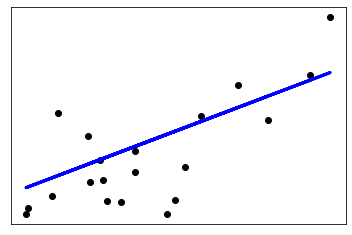

In [28]:

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
# print(diabetes_X_train, diabetes_y_train)
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [93]:

pyfeat_rating_all = {}

# f = True
for target_emotion in 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', '):
# for target_emotion in ['disgust']:
# target_emotion = 'anger'

    BOA_final_select_folder_path = 'ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/selected_files_OnlineExp/BOA_optimized/' + target_emotion + '/'

    pyfeat_rating_all[target_emotion] = []
    # namba normal
    tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][0])
#     print(round(tempnamba[target_emotion].values[0], 6))
#     print(tempnamba)
#     print()
    pyfeat_rating_all[target_emotion].append([round(x, 6) for x in list(tempnamba.iloc[0, 1:8])])
    # namba normal hot
    if target_emotion != 'neutral':
        tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][1])
#         print(tempnamba)
#         print(round(tempnamba[target_emotion].values[0], 6))
        pyfeat_rating_all[target_emotion].append([round(x, 6) for x in list(tempnamba.iloc[0, 1:8])])
    else:
        pyfeat_rating_all[target_emotion].append([round(x, 6) for x in list(tempnamba.iloc[0, 1:8])])
    
    for i in range(5):
        temp = pd.read_csv(BOA_final_select_folder_path + BOA_final_select[target_emotion][i][1][:-4] + '_emotion.csv')
#         print(round(temp[target_emotion].values[0], 6))
        pyfeat_rating_all[target_emotion].append([round(x, 6) for x in list(temp.iloc[0, 1:8])])


print(pyfeat_rating_all['anger'])

[[0.070583, 0.01583, 0.007122, 0.007172, 0.024182, 0.02329, 0.85182], [0.81069, 0.004743, 0.035307, 0.000733, 0.015798, 0.113932, 0.018797], [0.936236, 0.001562, 0.03045, 0.000496, 0.002803, 0.025623, 0.002831], [0.931665, 0.002194, 0.031207, 0.004019, 0.00311, 0.025177, 0.002629], [0.927082, 0.002051, 0.041748, 0.002562, 0.003559, 0.020706, 0.002292], [0.914131, 0.00596, 0.05087, 0.003181, 0.005661, 0.016743, 0.003454], [0.913679, 0.003109, 0.025906, 0.001053, 0.004314, 0.044802, 0.007137]]


current emo is: anger
current emo is: disgust
current emo is: fear
current emo is: happiness
current emo is: sadness
current emo is: surprise
current emo is: neutral


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

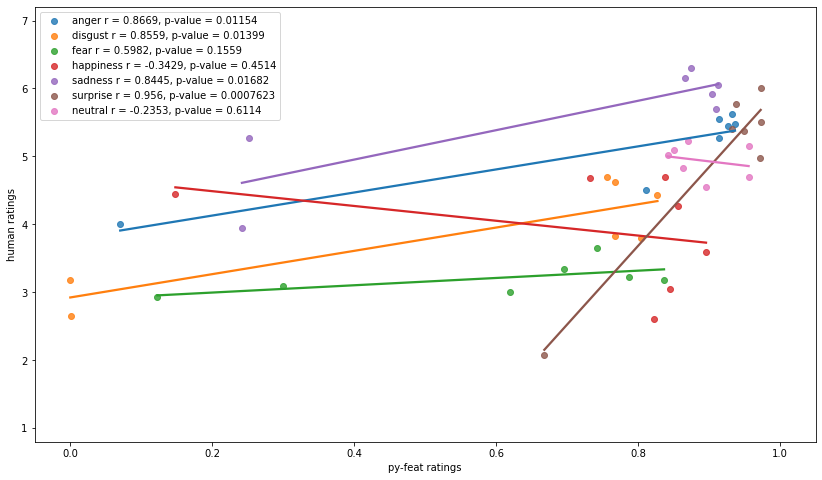

In [103]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
# print(total_data.head())

def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
            
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
id = 1
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color

for i in range(7):
#     if i != id:
#         continue
    current_emo = emo_names[i]
    print('current emo is:', current_emo)
    temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(7)]]

#     fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#     fig.set_facecolor('white') # set background color
    # ---------------
    # plt.figure(figsize=(14, 8))
    # x = pyfeat_rating[emo_names[id]][i]
    # print(x)
    # y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[i]]
    x = []
    y = []
    fig_data = []
    for j in range(len(temp_data_with_temp_rating.columns)):
        temp_x = pyfeat_rating[current_emo][j]
        x.append(temp_x)
        temp_y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[j]]
        y.append(np.mean(temp_y))
        fig_data.append([temp_x, np.mean(temp_y)])
    fig_data = sorted(fig_data, key=lambda x:x[0]) 
    fig_data = np.array(fig_data)
    fig_data = fig_data.transpose()
    temp_emo = current_emo
    for item in fig_data[0]:
        item = [item]
#     print('fig_data', fig_data)

    # LinearRegression
    X, y = fig_data[0], fig_data[1]
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
#     print('coefficient of determination:', reg.score(X, y))
    
#     print('intercept', reg.intercept_, '\nslope', reg.coef_[0] )
#     print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_, reg.coef_[0]))
    
    # Predict response
    predictions = reg.predict(X)
    
    # pearsonr
    #     my_corrcoef = stats.pearsonr(fig_data[0], y)
    #     print('my_corrcoef', my_corrcoef)

    #     my_rho = np.corrcoef(fig_data[0], y)
    #     print('my_rho', my_rho)
    
    # Use stats linregress library
    reg2 = stats.linregress(fig_data[0], y)
#     print(reg2)
#     print("The linear model is: Y = {:.5} + {:.5}X".format(reg2.intercept, reg2.slope))
#     print(reg2.rvalue, reg2.pvalue)
    
#     plt.scatter(fig_data[0], fig_data[1], label=temp_emo)
#     plt.plot(fig_data[0], predictions, linewidth=2)
    sns.regplot(fig_data[0], fig_data[1], ci=None, label=temp_emo + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.xlabel('py-feat ratings')
    plt.ylabel('human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
    plt.legend()
#     print(temp_data_with_temp_rating.columns[i])
fig.savefig('pyfeatwithrating.png', dpi=300)
# sns.scatterplot(data, x="total_bill", y="tip")

## Figure 2: 7 figures for all ratings

In [ ]:
pyfeat_rating

LinregressResult(slope=3.245203941734151, intercept=2.5553117000811323, rvalue=0.704940687506156, pvalue=1.566384996387391e-08, stderr=0.47626623009645874, intercept_stderr=0.1540418260844824)
The linear model is: Y = 2.5553 + 3.2452X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=2.2987021874911706, intercept=2.706514004304143, rvalue=0.5127594799607815, pvalue=0.00016524000541473524, stderr=0.5614055766886579, intercept_stderr=0.14486252841665204)
The linear model is: Y = 2.7065 + 2.2987X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=1.6287377872700657, intercept=2.247041342601417, rvalue=0.5668585547523052, pvalue=2.172754109940012e-05, stderr=0.34526877611115114, intercept_stderr=0.08512419334060294)
The linear model is: Y = 2.247 + 1.6287X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=2.8393397153416227, intercept=1.4881230423055642, rvalue=0.8256426036842898, pvalue=2.883100818735439e-13, stderr=0.2830117077772064, intercept_stderr=0.08331157910382708)
The linear model is: Y = 1.4881 + 2.8393X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=4.535943806807348, intercept=2.150058069127732, rvalue=0.9214080813893195, pvalue=6.368065416612733e-21, stderr=0.279039362945119, intercept_stderr=0.08122815891487042)
The linear model is: Y = 2.1501 + 4.5359X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=3.0223834866367256, intercept=2.100874668392529, rvalue=0.7681033011478078, pvalue=1.1831766832878303e-10, stderr=0.36752095621933645, intercept_stderr=0.1421656695819689)
The linear model is: Y = 2.1009 + 3.0224X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=2.8727927478342687, intercept=1.9587265248680512, rvalue=0.8347922266464864, pvalue=1.6594653671279945e-13, stderr=0.27935449783546773, intercept_stderr=0.10759350549079574)
The linear model is: Y = 1.9587 + 2.8728X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


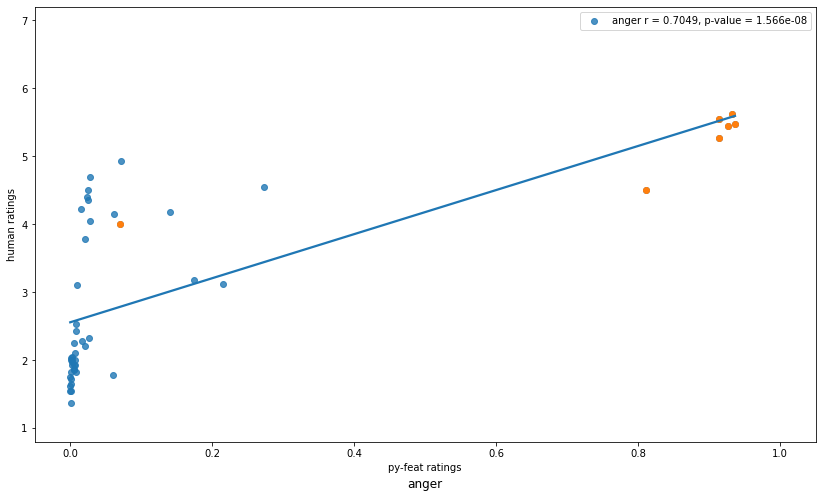

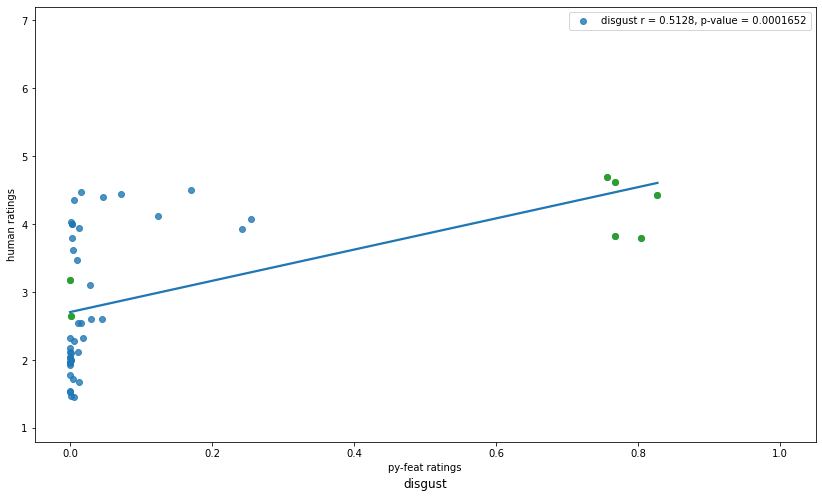

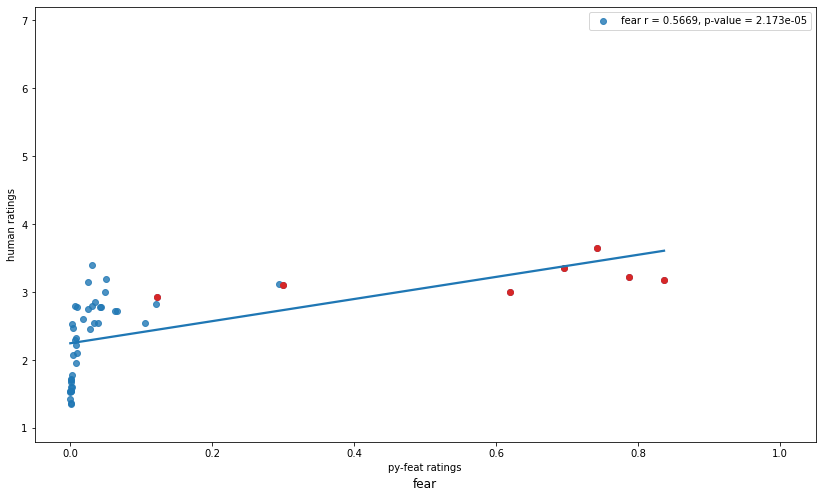

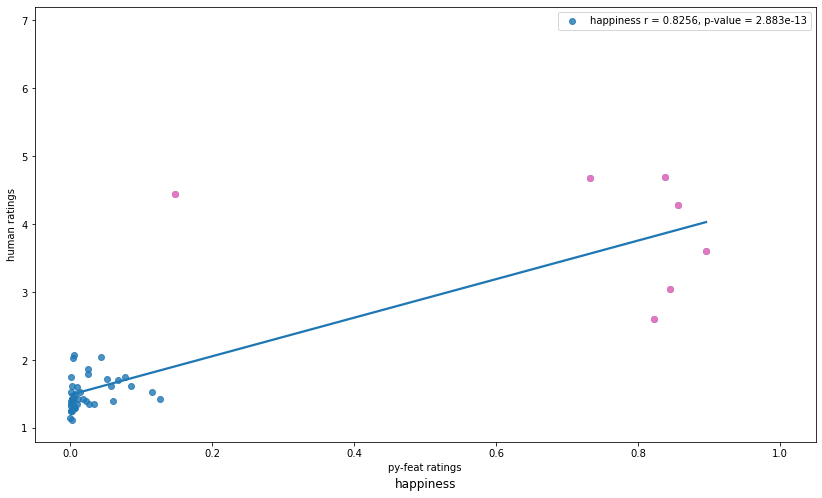

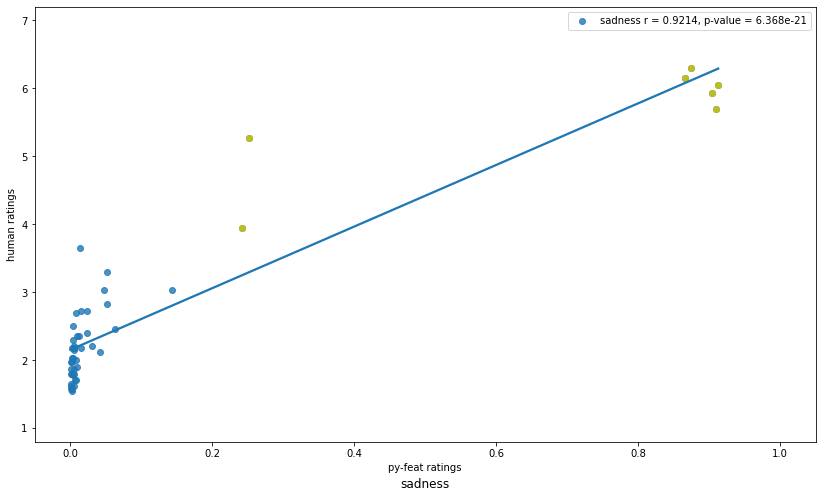

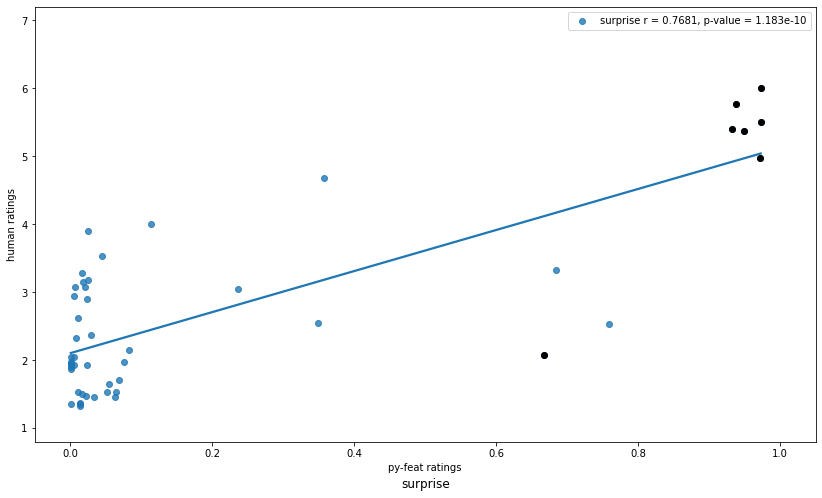

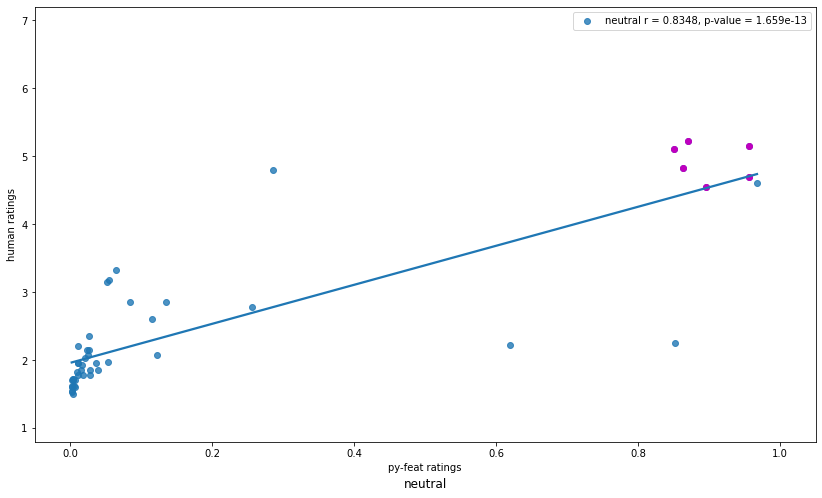

In [140]:
import seaborn as sns
# print(total_data.head())

def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
            
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
id = 0
# fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
# fig.set_facecolor('white') # set background color

# stimuli emo loop
# for i in range(7):
#     if i != id:
#         continue
#     current_stim_emo = emo_names[i]
#     print('current stimuli emo is:', current_stim_emo)
#     temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
# #     print(temp_data.head())
#     # target emo rating loop
    
#      # plotting 
# #     fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
# #     fig.set_facecolor('white') # set background color
#     fig_data = []
    
#     for j in range(7):
# #         current_target_emo = emo_names[j]
#         temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_stim_emo) + 7 * x for x in range(7)]]
# #         fig_data = []
#         for k in range(len(temp_data_with_temp_rating.columns)):
#             temp_x = pyfeat_rating[current_stim_emo][k]
#             temp_y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[k]]
#             fig_data.append([temp_x, np.mean(temp_y)])
#         fig_data = sorted(fig_data, key=lambda x:x[0]) 
#         fig_data = np.array(fig_data)
#         fig_data = fig_data.transpose()
        
#         temp_emo = current_stim_emo
        
# print(len(fig_data))
# print(fig_data)
# print(total_data.head())
# stimuli emo loop

for i in range(7):
#     if i != id:
#         continue
    current_emo = emo_names[i]
#     print('current emo is:', current_emo)
#     print('get_emo_num', get_emo_num(current_emo) + 1)
    temp_data = total_data.iloc[:, 14 + get_emo_num(current_emo) : -1 : 7].copy()
#     print(temp_data.head())
    x = []
    y = []
    fig_data = []
    for j in range(len(temp_data.columns)):
#         print(int(j/7))
#         print(emo_names[int(j/7)])
        temp_x = pyfeat_rating_all[emo_names[int(j/7)]][j % 7][i]
#         print('i, j, int(j/7), j%7', i, j, int(j/7), j%7)
       
        x.append(temp_x)
        temp_y = temp_data[temp_data.columns[j]]
        y.append(np.mean(temp_y))
        fig_data.append([temp_x, np.mean(temp_y)])
#         print('temp_x', temp_x, 'temp_y_mean', np.mean(temp_y))
#     fig_data = sorted(fig_data, key=lambda x:x[0]) 
    fig_data = np.array(fig_data)
    fig_data = fig_data.transpose()
#     print(fig_data)
#     import seaborn as sn     
#     sns.distplot(fig_data)
    reg2 = stats.linregress(fig_data[0], fig_data[1])
    
    
    print(reg2)
    print("The linear model is: Y = {:.5} + {:.5}X".format(reg2.intercept, reg2.slope))
    
    X, y = fig_data[0], fig_data[1]
    X = X[:, None] # Reshape to 2D as requested
#     model = sm.OLS(y, X).fit()
#     print(model.slope)
#     print(model.intercept)
#     from sklearn import linear_model
#     lr = linear_model.LinearRegression()
#     lr.fit(X, y)
#     print('slope', lr.coef_, 'intercept', lr.intercept_)
    
# -------
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
    
    sns.regplot(fig_data[0], fig_data[1], ci=None, label=current_emo + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
#     plt.plot(fig_data[0], fig_data[1], label=temp_emo + ' rating')
    # 7 different color points
    for j in range(len(temp_data.columns)):
        temp_x = pyfeat_rating_all[emo_names[int(j/7)]][j % 7][i]       
        temp_y = temp_data[temp_data.columns[j]]
        if int(j / 7) == i:
            plt.scatter(temp_x, np.mean(temp_y), c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#e377c2', '#bcbd22', 'k', 'm'][i + 1])
        
        
    plt.xlabel('py-feat ratings')
    plt.ylabel('human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
    plt.title(current_emo, y=-0.12)
    plt.legend()
# -------
        
#     fig = plt.figure(figsize=(15, 8))
#     fig = sm.graphics.plot_regress_exog(model, 'x1', fig=fig)
        
    fig.savefig(current_emo +'_49points.png', dpi=300)
    
#     fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#     fig.set_facecolor('white') # set background color
    # ---------------
    # plt.figure(figsize=(14, 8))
    # x = pyfeat_rating[emo_names[id]][i]
    # print(x)
    # y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[i]]
    

#     plt.plot(fig_data[0], fig_data[1], label=temp_emo)
# #     plt.plot(x, y, label=temp_emo)
# #     # plt.plot(x, y, label=temp_data_with_temp_rating.columns[i])
#     plt.xlabel('py-feat ratings')
#     plt.ylabel('human ratings')
#     plt.legend()
# #     print(temp_data_with_temp_rating.columns[i])
#     fig.savefig('pyfeatwithrating.png')
# sns.scatterplot(data, x="total_bill", y="tip")

LinregressResult(slope=3.245203941734151, intercept=2.5553117000811323, rvalue=0.704940687506156, pvalue=1.566384996387391e-08, stderr=0.47626623009645874, intercept_stderr=0.1540418260844824)
The linear model is: Y = 2.5553 + 3.2452X
LinregressResult(slope=2.2987021874911706, intercept=2.706514004304143, rvalue=0.5127594799607815, pvalue=0.00016524000541473524, stderr=0.5614055766886579, intercept_stderr=0.14486252841665204)
The linear model is: Y = 2.7065 + 2.2987X
LinregressResult(slope=1.6287377872700657, intercept=2.247041342601417, rvalue=0.5668585547523052, pvalue=2.172754109940012e-05, stderr=0.34526877611115114, intercept_stderr=0.08512419334060294)
The linear model is: Y = 2.247 + 1.6287X
LinregressResult(slope=2.8393397153416227, intercept=1.4881230423055642, rvalue=0.8256426036842898, pvalue=2.883100818735439e-13, stderr=0.2830117077772064, intercept_stderr=0.08331157910382708)
The linear model is: Y = 1.4881 + 2.8393X
LinregressResult(slope=4.535943806807348, intercept=2.1

/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

LinregressResult(slope=3.0223834866367256, intercept=2.100874668392529, rvalue=0.7681033011478078, pvalue=1.1831766832878303e-10, stderr=0.36752095621933645, intercept_stderr=0.1421656695819689)
The linear model is: Y = 2.1009 + 3.0224X
LinregressResult(slope=2.8727927478342687, intercept=1.9587265248680512, rvalue=0.8347922266464864, pvalue=1.6594653671279945e-13, stderr=0.27935449783546773, intercept_stderr=0.10759350549079574)
The linear model is: Y = 1.9587 + 2.8728X


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


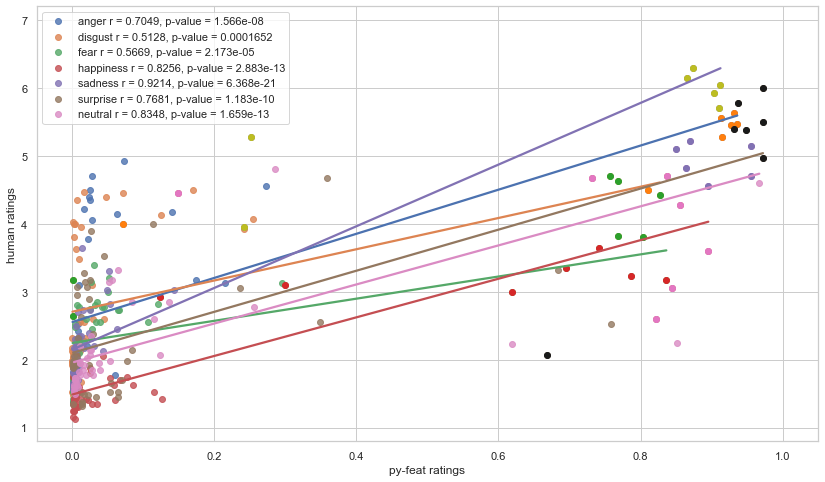

In [239]:
import seaborn as sns
# print(total_data.head())

def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
            
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
id = 0

fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color

for i in range(7):
#     if i != id:
#         continue
    current_emo = emo_names[i]
#     print('current emo is:', current_emo)
#     print('get_emo_num', get_emo_num(current_emo) + 1)
    temp_data = total_data.iloc[:, 14 + get_emo_num(current_emo) : -1 : 7].copy()
#     print(temp_data.head())
    x = []
    y = []
    fig_data = []
    for j in range(len(temp_data.columns)):
#         print(int(j/7))
#         print(emo_names[int(j/7)])
        temp_x = pyfeat_rating_all[emo_names[int(j/7)]][j % 7][i]
#         print('i, j, int(j/7), j%7', i, j, int(j/7), j%7)
       
        x.append(temp_x)
        temp_y = temp_data[temp_data.columns[j]]
        y.append(np.mean(temp_y))
        fig_data.append([temp_x, np.mean(temp_y)])
#         print('temp_x', temp_x, 'temp_y_mean', np.mean(temp_y))
#     fig_data = sorted(fig_data, key=lambda x:x[0]) 
    fig_data = np.array(fig_data)
    fig_data = fig_data.transpose()
    reg2 = stats.linregress(fig_data[0], fig_data[1])
    
    
    print(reg2)
    print("The linear model is: Y = {:.5} + {:.5}X".format(reg2.intercept, reg2.slope))
    
    X, y = fig_data[0], fig_data[1]
    X = X[:, None] # Reshape to 2D as requested
# -------
    
    
    sns.regplot(fig_data[0], fig_data[1], ci=None, label=current_emo + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
#     plt.plot(fig_data[0], fig_data[1], label=temp_emo + ' rating')
    # 7 different color points
    for j in range(len(temp_data.columns)):
        temp_x = pyfeat_rating_all[emo_names[int(j/7)]][j % 7][i]       
        temp_y = temp_data[temp_data.columns[j]]
        if int(j / 7) == i:
            plt.scatter(temp_x, np.mean(temp_y), c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#e377c2', '#bcbd22', 'k', 'm'][i + 1])
        
        
    plt.xlabel('py-feat ratings')
    plt.ylabel('human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
#     plt.title(current_emo, y=-0.12)
    plt.legend()
fig.savefig('allemo_49points.png', dpi=300)
    

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.426
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              35.67
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                    2.76e-07
Time:                        05:46:16   Log-Likelihood:                         -114.33
No. Observations:                  49   AIC:                                      230.7
Df Residuals:                      48   BIC:                                      232.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.6500      1.113      5.973      0.000       4.411       8.889
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.085
Skew:                          -0.359   Prob(JB):                        0.581
Kurtosis:                       3.127   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
a = np.array([0.070583, 0.81069,  0.936236, 0.931665, 0.927082, 0.914131, 0.913679])
print(a)
sorted(a, key=lambda x:x)
print(a)

[0.070583 0.81069  0.936236 0.931665 0.927082 0.914131 0.913679]
[0.070583 0.81069  0.936236 0.931665 0.927082 0.914131 0.913679]


In [ ]:
print(total_data_np.mean(axis=0))

In [3]:
practiceHA_data = total_data.iloc[:, 0:7].copy()

In [ ]:
print(anger_only_data)

# Namba normal, Namba hot, BOA 0, ANOVA, t-test

In [29]:
def multiple_analysis_1_with_fig(id):
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
            
        
        
    for i in range(7):
        if i != id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data.head())
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
#         print(temp_data_with_temp_rating.head())
        temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
#         print(list(temp_data_with_temp_rating.columns)[:])
#         temp_data_with_temp_rating.iloc[:, 1:].to_csv('temp'+current_emo+'.csv')
        df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
                     var_name='stimulus', value_name='rating')
        print(df)
        # one-way repeated measures ANOVA
        # the within subject model 
        import pingouin as pg
        res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=df, detailed=True)
        print()
        print(res)
        print()

        from statsmodels.stats.multicomp import MultiComparison
        #Then, do the multiple testing in Tukey's test
        mc = MultiComparison(df['rating'], df['stimulus'])
#         print(mc.tukeyhsd().summary())
#         # Show the group names
#         print(mc.groupsunique)

        # Instead of the Tukey's test, we can do pairwise t-test
        # First, with the "Holm" correction
        rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
        print('Multiple Comparison Using Holm method')
        print((rtp[0]))

In [22]:
multiple_analysis_1_with_fig(0)

current emo is  anger
     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
115     35      BOA Anger 0_1       5
116     36      BOA Anger 0_1       5
117     37      BOA Anger 0_1       6
118     38      BOA Anger 0_1       6
119     39      BOA Anger 0_1       7

[120 rows x 3 columns]

     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2       stat   pval  pval_corr reject
-------------------------------------------------------------

In [24]:
multiple_analysis_1_with_fig(1)

current emo is  disgust
     index           stimulus  rating
0        0  Namba normal Di_6       6
1        1  Namba normal Di_6       2
2        2  Namba normal Di_6       2
3        3  Namba normal Di_6       1
4        4  Namba normal Di_6       1
..     ...                ...     ...
115     35    BOA Disgust 0_6       4
116     36    BOA Disgust 0_6       3
117     37    BOA Disgust 0_6       5
118     38    BOA Disgust 0_6       4
119     39    BOA Disgust 0_6       5

[120 rows x 3 columns]

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   66.516667   2  33.258333  21.237413  4.332449e-08  0.352562   
1     Error  122.150000  78   1.566026        NaN           NaN       NaN   

        eps  
0  0.990457  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
       group1              group2        stat   pval  pval_corr reject
------------------

In [17]:
multiple_analysis_1_with_fig(2)

current emo is  fear

     Source         SS  DF        MS         F     p-unc      np2      eps
0  stimulus   1.316667   2  0.658333  0.611188  0.545284  0.01543  0.99347
1     Error  84.016667  78  1.077137       NaN       NaN      NaN      NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
    group1           group2       stat   pval  pval_corr reject
---------------------------------------------------------------
  BOA Fear 0_2    Namba hot fe_2 0.3217 0.7494    0.9091  False
  BOA Fear 0_2 Namba normal Fe_2 1.0437  0.303    0.9091  False
Namba hot fe_2 Namba normal Fe_2 0.7838 0.4379    0.9091  False
---------------------------------------------------------------


In [18]:
multiple_analysis_1_with_fig(3)

current emo is  happiness

     Source          SS  DF         MS         F     p-unc       np2       eps
0  stimulus   25.716667   2  12.858333  9.094303  0.000282  0.189093  0.980042
1     Error  110.283333  78   1.413889       NaN       NaN       NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2        stat   pval  pval_corr reject
-------------------------------------------------------------------
BOA Happiness 0_3    Namba hot ha_3 -3.0508 0.0041    0.0082   True
BOA Happiness 0_3 Namba normal Ha_3 -3.9632 0.0003    0.0009   True
   Namba hot ha_3 Namba normal Ha_3 -0.9119 0.3674    0.3674  False
-------------------------------------------------------------------


In [30]:
multiple_analysis_1_with_fig(4)

current emo is  sadness
     index           stimulus  rating
0        0  Namba normal Sa_4       4
1        1  Namba normal Sa_4       2
2        2  Namba normal Sa_4       6
3        3  Namba normal Sa_4       7
4        4  Namba normal Sa_4       7
..     ...                ...     ...
115     35    BOA Sadness 0_4       7
116     36    BOA Sadness 0_4       4
117     37    BOA Sadness 0_4       7
118     38    BOA Sadness 0_4       5
119     39    BOA Sadness 0_4       7

[120 rows x 3 columns]

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   90.216667   2  45.108333  32.049036  6.930272e-11  0.451083   
1     Error  109.783333  78   1.407479        NaN           NaN       NaN   

        eps  
0  0.916929  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1           group2        stat   pval  pval_corr reject
-----------------------

In [31]:
multiple_analysis_1_with_fig(5)

current emo is  surprise
     index            stimulus  rating
0        0  Namba normal Sur_5       3
1        1  Namba normal Sur_5       1
2        2  Namba normal Sur_5       1
3        3  Namba normal Sur_5       1
4        4  Namba normal Sur_5       1
..     ...                 ...     ...
115     35    BOA Surprise 0_5       5
116     36    BOA Surprise 0_5       3
117     37    BOA Surprise 0_5       6
118     38    BOA Surprise 0_5       6
119     39    BOA Surprise 0_5       5

[120 rows x 3 columns]

     Source          SS  DF          MS           F         p-unc  \
0  stimulus  365.150000   2  182.575000  132.452488  8.315949e-26   
1     Error  107.516667  78    1.378419         NaN           NaN   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0  1.790617e-22  0.772532  0.857275      False  0.833513  0.031429  
1           NaN       NaN       NaN        NaN       NaN       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison tte

In [32]:
multiple_analysis_1_with_fig(6)

current emo is  neutral
     index            stimulus  rating
0        0  Namba normal Neu_7       5
1        1  Namba normal Neu_7       1
2        2  Namba normal Neu_7       6
3        3  Namba normal Neu_7       1
4        4  Namba normal Neu_7       4
..     ...                 ...     ...
115     35     BOA Neutral 0_7       5
116     36     BOA Neutral 0_7       2
117     37     BOA Neutral 0_7       7
118     38     BOA Neutral 0_7       5
119     39     BOA Neutral 0_7       3

[120 rows x 3 columns]

     Source     SS  DF        MS         F     p-unc  p-GG-corr      np2  \
0  stimulus    7.8   2  3.900000  1.998686  0.142394   0.152201  0.04875   
1     Error  152.2  78  1.951282       NaN       NaN        NaN      NaN   

        eps sphericity   W-spher  p-spher  
0  0.808224      False  0.762719  0.00582  
1       NaN        NaN       NaN      NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacB

     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
115     35      BOA Anger 0_1       5
116     36      BOA Anger 0_1       5
117     37      BOA Anger 0_1       6
118     38      BOA Anger 0_1       6
119     39      BOA Anger 0_1       7

[120 rows x 3 columns]
                   count   mean       std  min   25%  50%   75%  max
Namba normal An_1   40.0  4.000  1.585188  1.0  3.00  4.0  5.00  7.0
Namba hot Anger_1   40.0  4.500  1.739437  1.0  3.75  5.0  6.00  7.0
BOA Anger 0_1       40.0  5.475  1.584986  1.0  5.00  6.0  6.25  7.0
     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN
       

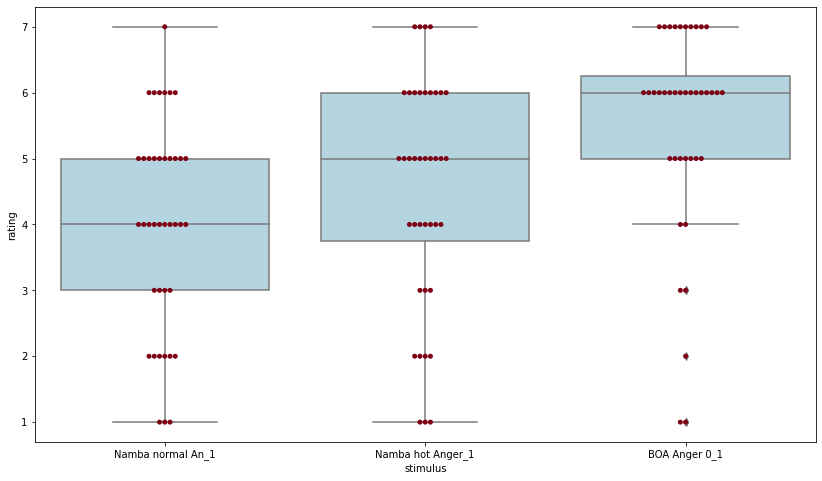

In [130]:
# anger total
anger_data = total_data.iloc[:, 14:14+7*7].copy()
# print(anger_data)
anger_only_data = anger_data.iloc[:, [0, 7, 14]]
anger_data_with_an_rating = anger_only_data.reset_index(drop=False)
# print(anger_data_with_an_rating)
# melt from the wide format to long format
anger_only_df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(anger_only_df)
summary = anger_only_data.describe()
summary = summary.transpose()
print(summary.head())

plt.figure(figsize=(14, 8))
ax2 = sns.boxplot(x="stimulus", y="rating", data=anger_only_df, color='lightblue')
ax2 = sns.swarmplot(x="stimulus", y="rating", data=anger_only_df, color='#7d0013')

# print('mean of anger:')
# print(anger_only_data.mean(axis=0))

# anger_only_data.to_csv('anger_only_data.csv')

# ---------------------
# incorrect in my data!!!!!!
# This is one-way between subjects ANOVA
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# model = ols('rating~C(stimulus)',data=anger_only_df).fit()
# anova_table = anova_lm(model, typ = 2)
# print(anova_table)
# ---------------------


# one-way repeated measures ANOVA
# the within subject model 
import pingouin as pg
res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=anger_only_df,detailed=True)
print(res)

from statsmodels.stats.multicomp import MultiComparison
groups = ['stimulus']
#Then, do the multiple testing
mc = MultiComparison(anger_only_df['rating'], anger_only_df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

# and then with the Bonferroni correction
# NOTICE: Holm always gives greater statistical power than Bonferroni. So let's use Holm instead.
# print((mc.allpairtest(stats.ttest_rel, method='b')[0]))

# # Done this way, the variance is calculated at each comparison.
# # If you want the joint variance across all samples, you have to 
# # use a few tricks:(http://jpktd.blogspot.co.at/2013/03/multiple-comparison-and-tukey-hsd-or_25.html)
# res2 = pairwise_tukeyhsd(dta2['StressReduction'], dta2['Treatment'])
# studentized_mean = res2.meandiffs
# studentized_variance = res2.variance

# t_stat = (studentized_mean / studentized_variance) / np.sqrt(2)
# dof = len(dta2) - len(mod.groupsunique)
# my_pvalues = stats.t.sf(np.abs(t_stat), dof) * 2  # two-sided

# # Now with the Bonferroni correction
# from statsmodels.stats.multitest import multipletests
# res_b = multipletests(my_pvalues, method='b')

# Anger - plot a bar chart

['Namba normal An_1', 'Namba hot Anger_1', 'BOA Anger 0_1', 'BOA Anger 3_1', 'BOA Anger 5_1', 'BOA Anger 8_1', 'BOA Anger 9_1']
     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
275     35      BOA Anger 9_1       4
276     36      BOA Anger 9_1       5
277     37      BOA Anger 9_1       1
278     38      BOA Anger 9_1       4
279     39      BOA Anger 9_1       7

[280 rows x 3 columns]


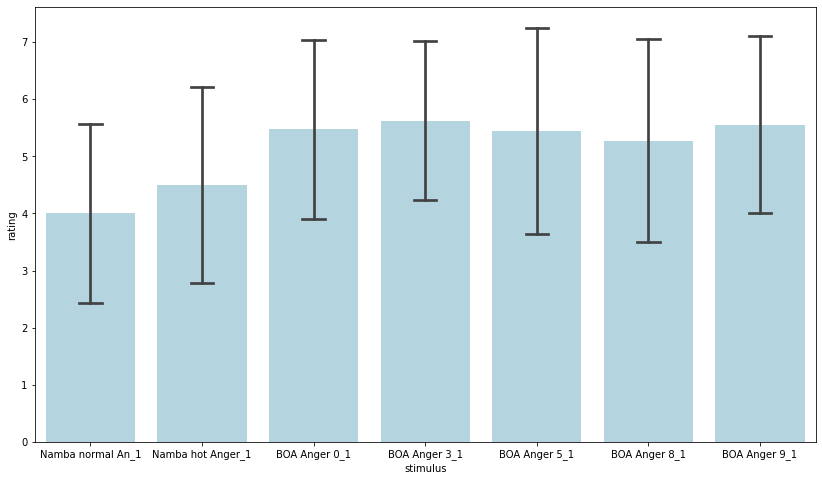

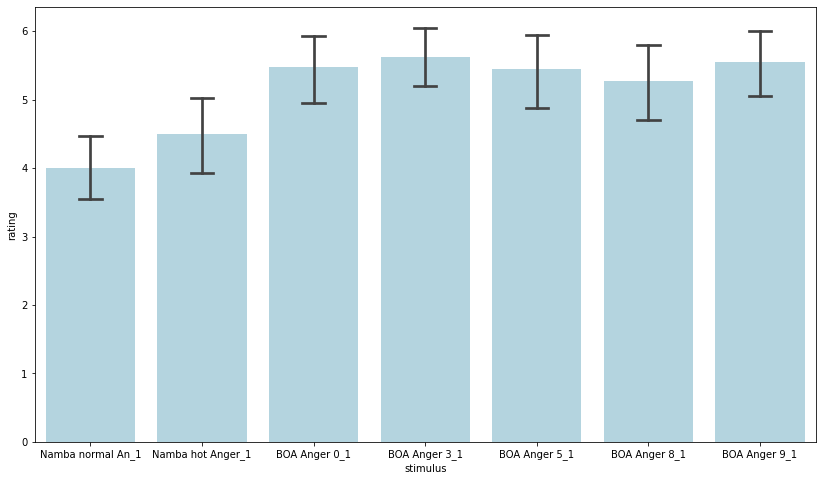

In [116]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data
anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# Disgust & the rest

In [52]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
print(emo_names)

['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


In [ ]:
#Then, do the multiple testing
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['rating'], df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

In [153]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

In [154]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [216]:
stim_name = [i for i in emo_names for _ in range(40)]
print(stim_name)

['anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear',

No handles with labels found to put in legend.


current emo is  anger
   Namba normal An_1  Namba hot Anger_1  BOA Anger 0_1
0                  4                  5              4
1                  5                  2              5
2                  5                  5              6
3                  1                  2              3
4                  6                  5              6
current emo is  disgust
   Namba normal Di_6  Namba hot Disgust_6  BOA Disgust 0_6
0                  6                    4                5
1                  2                    1                3
2                  2                    2                6
3                  1                    1                4
4                  1                    5                5
current emo is  fear
   Namba normal Fe_2  Namba hot fe_2  BOA Fear 0_2
0                  6               4             3
1                  2               2             2
2                  5               7             6
3                  1               1         

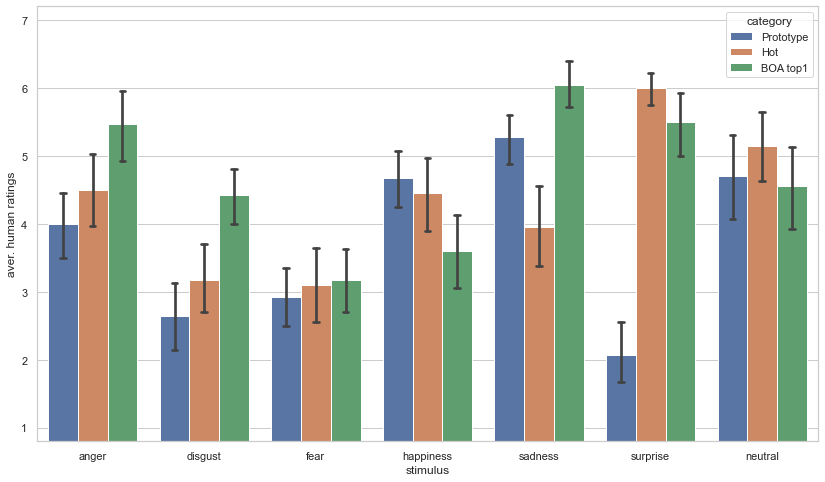

In [249]:
multiple_analysis_with_fig(7)

No handles with labels found to put in legend.


current emo is  anger*
   Namba normal An_1  Namba hot Anger_1  BOA Anger 0_1
0                  4                  5              4
1                  5                  2              5
2                  5                  5              6
3                  1                  2              3
4                  6                  5              6
current emo is  disgust*
   Namba normal Di_6  Namba hot Disgust_6  BOA Disgust 0_6
0                  6                    4                5
1                  2                    1                3
2                  2                    2                6
3                  1                    1                4
4                  1                    5                5
current emo is  fear
   Namba normal Fe_2  Namba hot fe_2  BOA Fear 0_2
0                  6               4             3
1                  2               2             2
2                  5               7             6
3                  1               1       

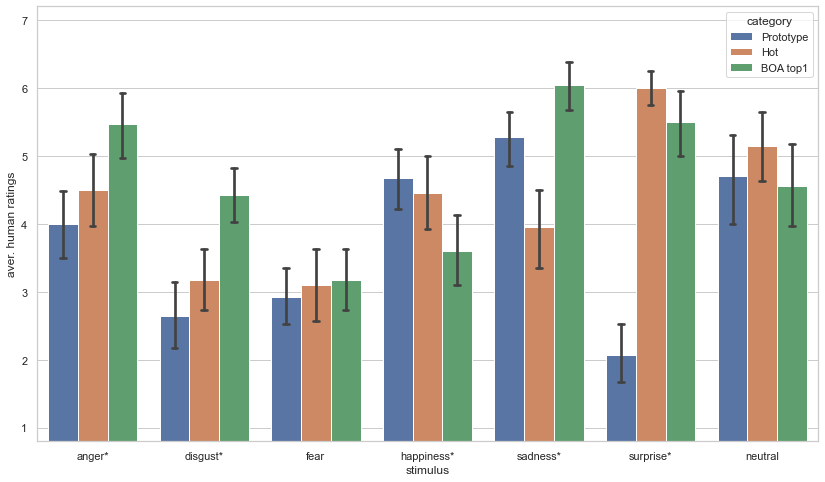

In [295]:
multiple_analysis_with_fig(7)

In [266]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
print(df.columns)
temp = pd.melt(df, value_vars = list(df.columns), var_name='stimulus', value_name = 'Py-Feat score')
# df = pd.melt(temp_data_with_temp_rating, 
#              value_vars=list(temp_data_with_temp_rating.columns),
#              var_name='stimulus', 
#              value_name='aver. human ratings')
print(temp)


Index(['A', 'B', 'C'], dtype='object')
  stimulus Py-Feat score
0        A             a
1        A             b
2        A             c
3        B             1
4        B             3
5        B             5
6        C             2
7        C             4
8        C             6


12
  Py_Feat_prob  stimulus
0        anger    0.0040
1      disgust    0.3525
2         fear    0.8858
3    happiness    0.1670
4      sadness    0.7344
5     surprise    0.3657


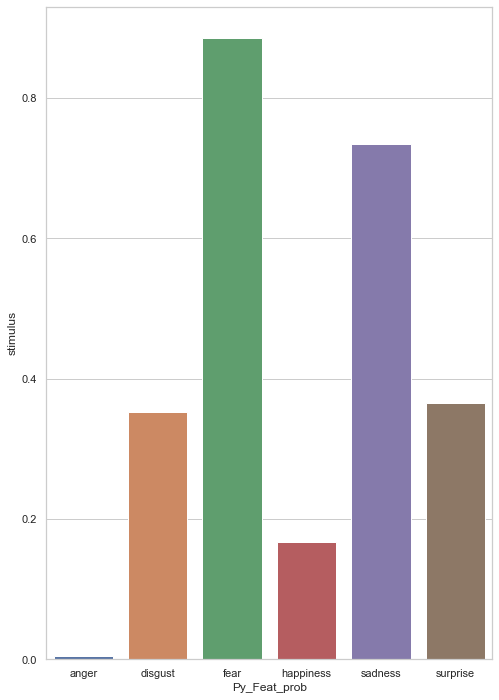

[0.55, 0.483, 0.9, 0.817, 0.95]
   Human_acc  stimulus
0      anger     0.400
1    disgust     0.550
2       fear     0.483
3  happiness     0.900
4    sadness     0.817
5   surprise     0.950


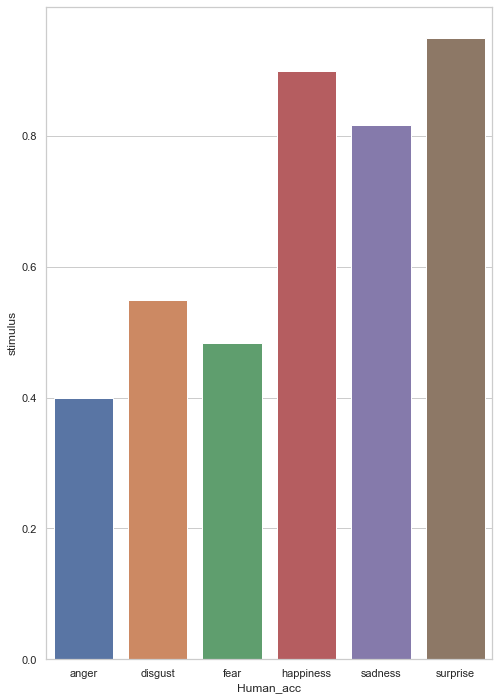

In [352]:

x_label = 'anger, disgust, fear, happiness, sadness, surprise'.split(', ')
data = [0.004, 0.3525, 0.8858, 0.1670, 0.7344, 0.3657,0.4000, 0.5500, 0.4830, 0.9000, 0.8170, 0.9500]
# x_label = 'anger, disgust, fear, happiness, sadness, surprise, category'.split(', ')
# data = [0.0004, 0.3525, 0.8858, 0.1670, 0.7344, 0.3657, 'Py-Feat(probability)',0.4000, 0.5500, 0.4830, 0.9000, 0.8170, 0.9500, 'Human(accuracy)']
y_label = 'Py_Feat_prob,Human_acc'.split(',')
# a = np.array(data)
# data = a.reshape([2, 6])
# cate_ = []
# for i in range(0, 6):
#     [cate_.append(x) for x in y_label]
# df = pd.DataFrame(data, [0, 1], x_label)
# # df_new = df.rename(index={0: 'Py-Feat(probability)', 1:"Human(accuracy)"})
# df1 = df.iloc[0, :]
# df2 = df.iloc[1, :]
# print(df.columns)
# df1 = pd.melt(df1, value_vars = list(df.columns), var_name='stimulus', value_name = 'Py-Feat(probability)')
# df2 = pd.melt(df2, value_vars = list(df1.columns), var_name='stimulus', value_name = "Human(accuracy)")

# temp = pd.melt(df, value_vars = list(df.columns), var_name='stimulus', value_name = 'Py-Feat score')
# temp['category'] = cate_
# fig, ax = plt.subplots(figsize=(8, 12)) # set figure size
# fig.set_facecolor('white') # set background color
# # plt.xlim(-0.05, 1.05)
# plt.ylim(-0.1, 1.1)
# df = temp
# ax = sns.barplot(x="stimulus", y="Py-Feat score", hue='category',  data=df, estimator=np.mean, ci=None, capsize=.05)
# fig.savefig('pyfeat_evaluat.png', dpi=300)


# print('df_new\n', df_new)
# print(df1.shape)
# df1 = df1.reshape((1,6))
print(len(data))
fig, ax = plt.subplots(figsize=(8, 12)) # set figure size
fig.set_facecolor('white') # set background color
df1 = pd.DataFrame({y_label[0]: x_label, 'stimulus': data[0:6]})
print(df1)
ax = sns.barplot(y = 'stimulus', x = y_label[0], 
              data = df1)
# ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

fig, ax = plt.subplots(figsize=(8, 12)) # set figure size
fig.set_facecolor('white') # set background color
print(data[7:])
df2 = pd.DataFrame({y_label[1]: x_label, 'stimulus': data[6:]})
print(df2)
ax = sns.barplot(y = 'stimulus', x = y_label[1], 
              data = df2)
plt.show()


In [293]:
list(total_data.columns)
def multiple_analysis_with_fig(id):
    emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if 'anger' in name.lower()  :
            return 0
        elif 'disgust' in name.lower() :
            return 5
        elif 'fear' in name.lower():
            return 1
        elif "happiness" in name.lower():
            return 2
        elif "sadness" in name.lower():
            return 3
        elif "surprise" in name.lower():
            return 4
        elif "neutral" in name.lower():
            return 6
            
    # New fig
    df = []
    flag = True
    for i in range(7):
        if i > id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
#         print(temp_data_with_temp_rating.head())
        
        if flag:
#             print(type(df))
            df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='stimulus', value_name='aver. human ratings')
            df['emotion'] = current_emo
            flag = False
        else:
            temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='stimulus', value_name='aver. human ratings')
            temp_df['emotion'] = current_emo
            df = pd.concat([df, temp_df], axis=0)
    
    category_list = []
    cate_ = ['Prototype', 'Hot', 'BOA top1']
    for i in range(7):
        for j in range(3):
            for k in range(40):
                category_list.append(cate_[j])
    df['category']=category_list

    stim_name = [i for i in emo_names for _ in range(40 * 3)]
#     print(stim_name)
    df['stimulus']=stim_name
    print(df)
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
#         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
    plt.legend()
    print('error bar means  95% confidence interval')
    ax = sns.barplot(x="stimulus", y="aver. human ratings", hue='category',  data=df, estimator=np.mean, ci=95, capsize=.05)
        
    fig.savefig('meanfor3.png', dpi=300)
    
#     for i in range(7):
#         if i != id:, 
#             continue
#         current_emo = emo_names[i]
#         print('current emo is ', current_emo)
#         temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
# #         print(temp_data)
#         temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
# #         print(temp_data_with_temp_rating.iloc[:2, :2])
#         temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
# #         print(list(temp_data_with_temp_rating.columns)[:])
#         df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
#                      var_name='stimulus', value_name='aver. human ratings')
# #         print(df)


# #         # Set the figure size
#         fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
# #         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
# #         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         print('error bar means standard deviation')
# #         # plot a bar chart
#         ax = sns.barplot(x="stimulus", y="aver. human ratings", hue='emotion', data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')
#         ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
    
#     fig.savefig('fig1.png', dpi=300)
    
    
#         print('error bar means 95% confidence interval')
#         fig, ax2 = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         ax2 = sns.barplot(x="stimulus", y="aver. human ratings", data=df, estimator=np.mean, capsize=.2, color='lightblue')
#         fig.savefig('fig2.png', dpi=300)
        
#         plt.figure(figsize=(14, 8))
#         fig, ax3 = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         ax3 = sns.boxplot(x="stimulus", y="aver. human ratings", data=df, color='lightblue')
# #         ax2.savefig
#         ax3 = sns.swarmplot(x="stimulus", y="aver. human ratings", data=df, color='#7d0013')
#         fig.savefig('fig3.png', dpi=300)
#         # ANOVA analysis
#         # one-way repeated measures ANOVA
#         # the within subject model 
#         import pingouin as pg
#         res = pg.rm_anova(dv='aver. human ratings', within='stimulus', subject='index', data=df, detailed=True)
#         print("one-way repeated measures ANOVA is:")
#         print(res)
        





No handles with labels found to put in legend.


current emo is  anger
error bar means standard deviation


No handles with labels found to put in legend.


error bar means 95% confidence interval


No handles with labels found to put in legend.


one-way repeated measures ANOVA is:
     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN


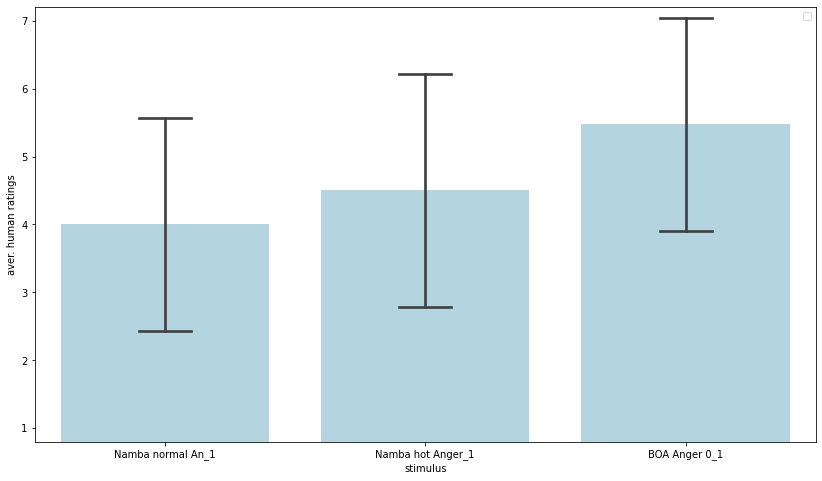

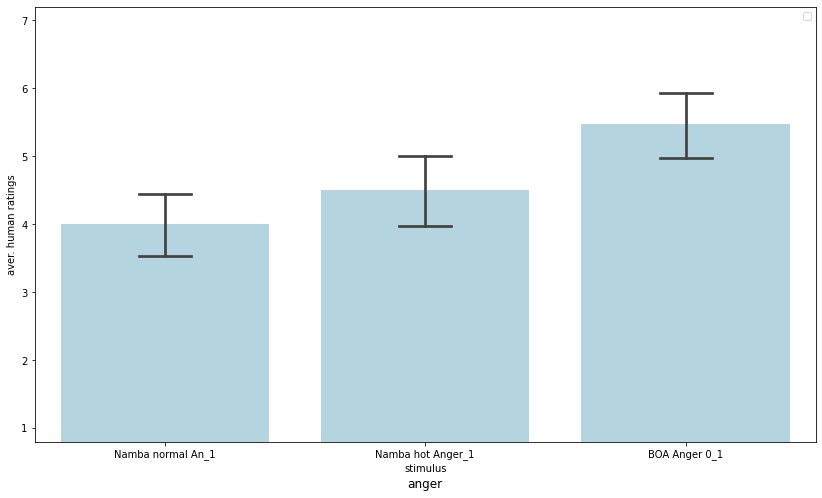

<Figure size 1008x576 with 0 Axes>

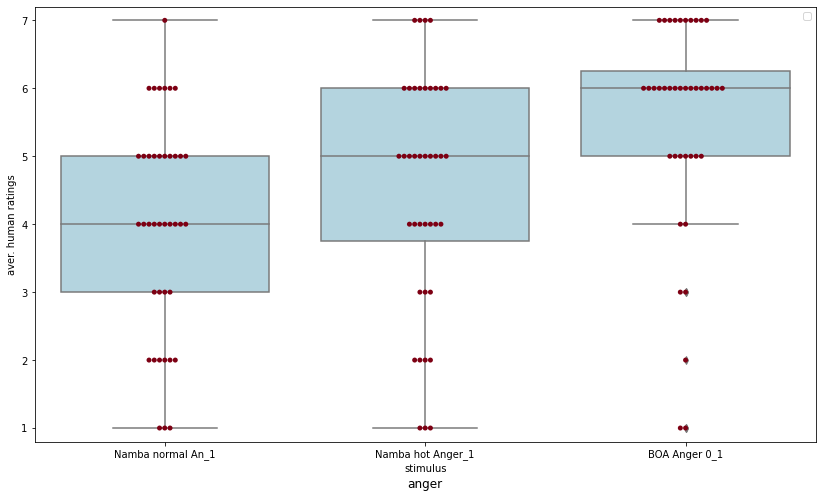

In [152]:
multiple_analysis_with_fig(0)

current emo is  disgust
error bar means standard deviation
error bar means 95% confidence interval


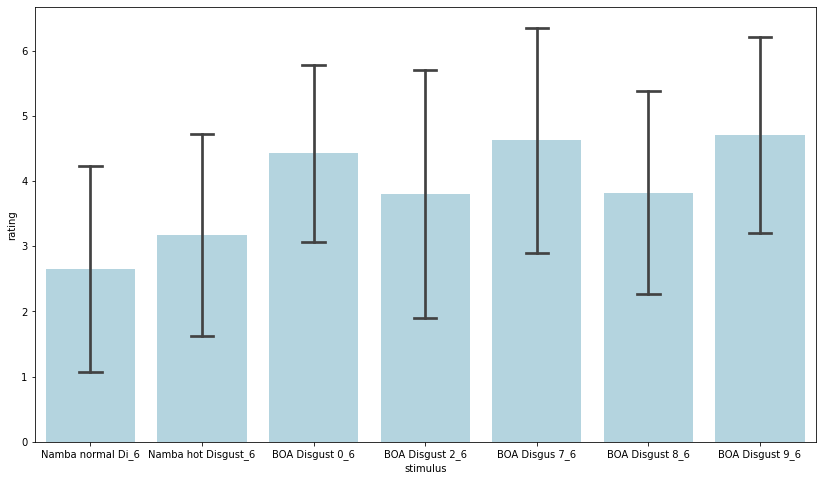

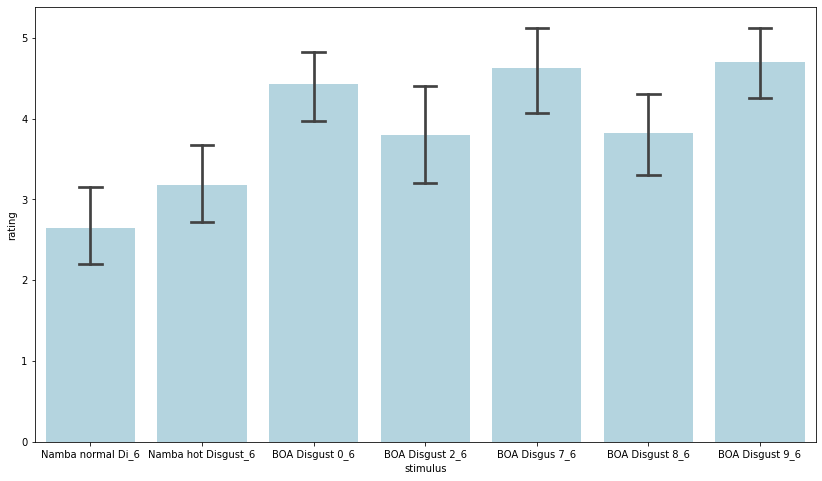

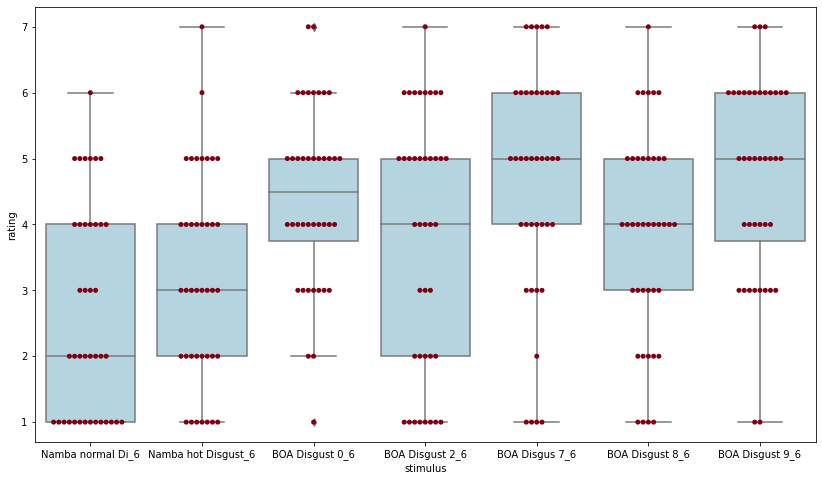

In [108]:
show_figure(1)

current emo is  fear
error bar means standard deviation
error bar means 95% confidence interval


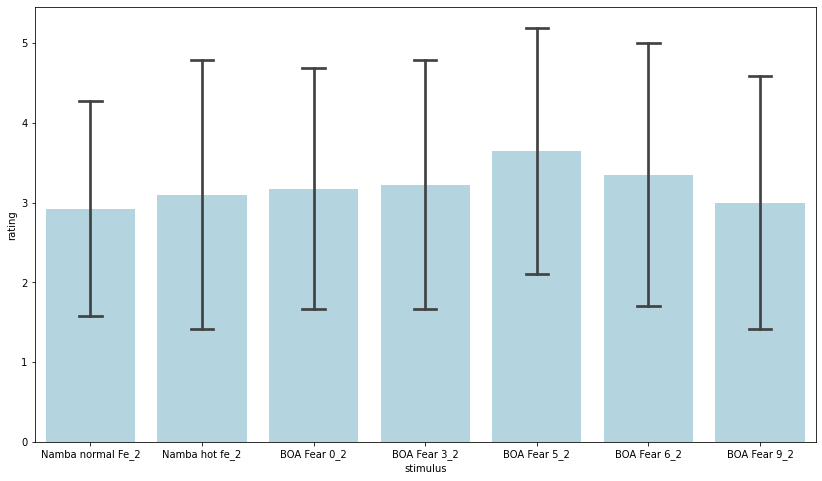

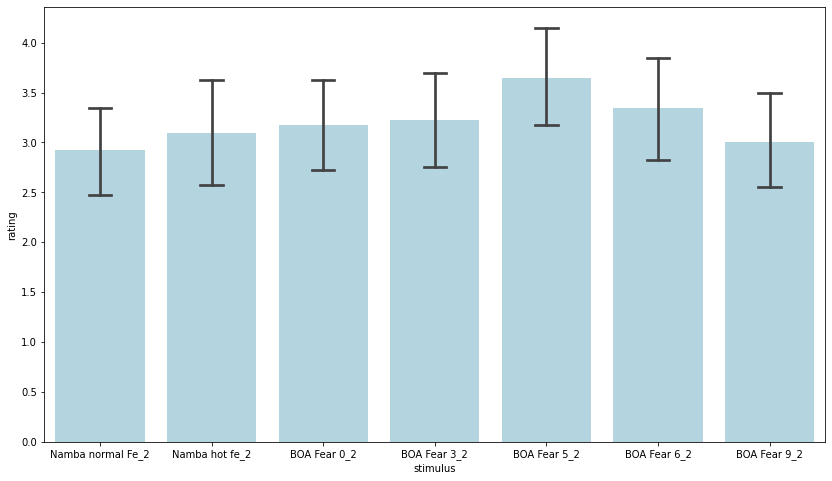

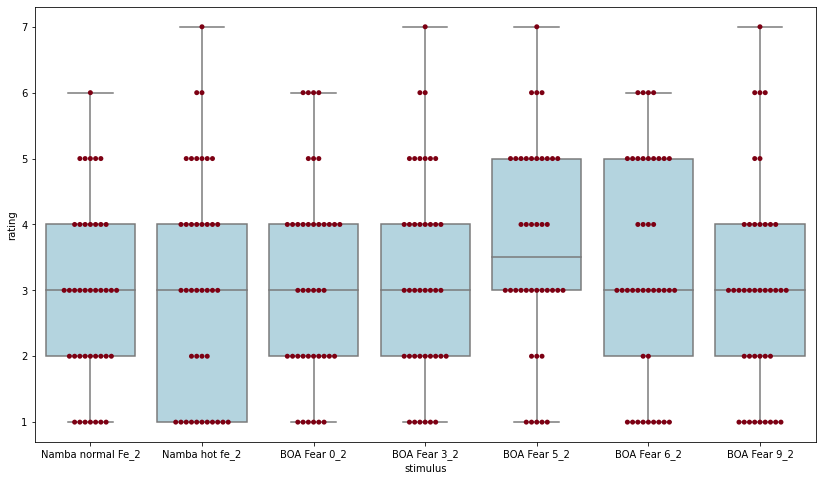

In [109]:
show_figure(2)

current emo is  happiness
error bar means standard deviation
error bar means 95% confidence interval


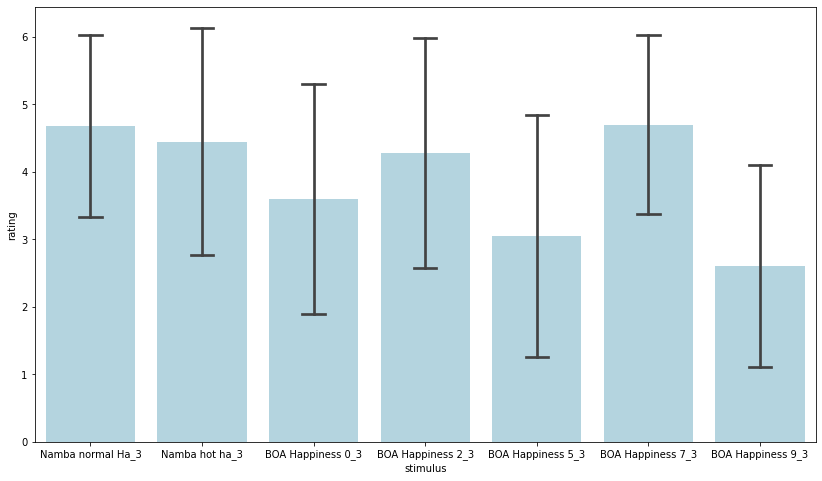

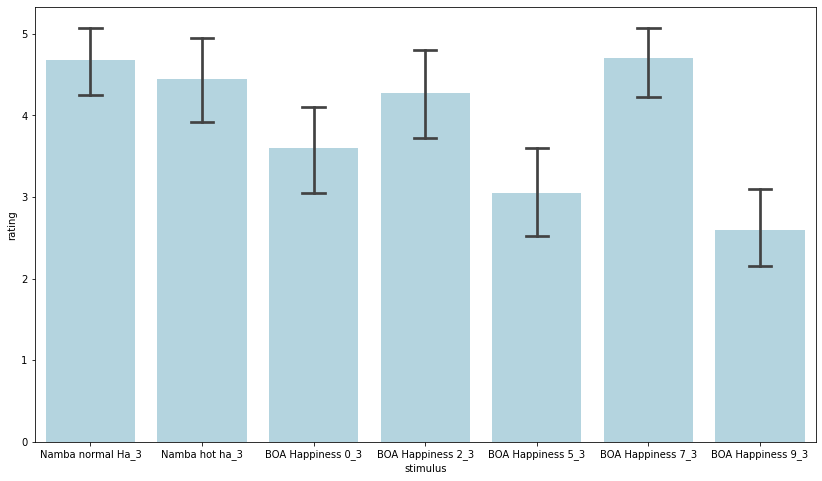

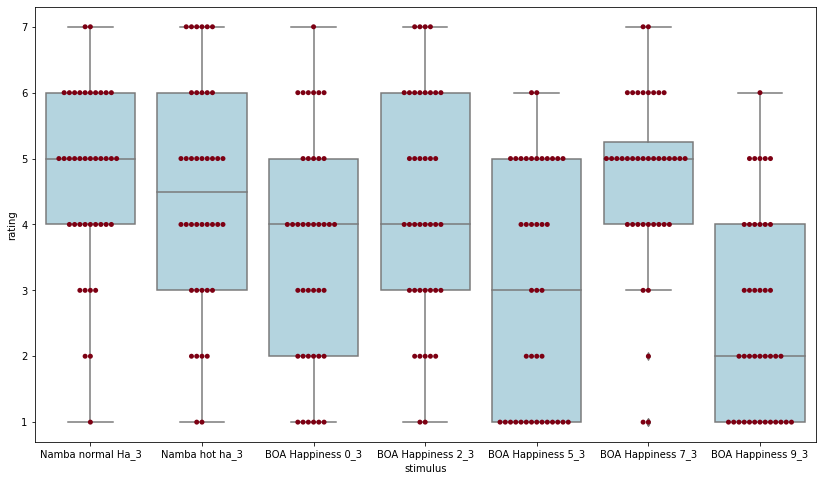

In [110]:
show_figure(3)

current emo is  sadness
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


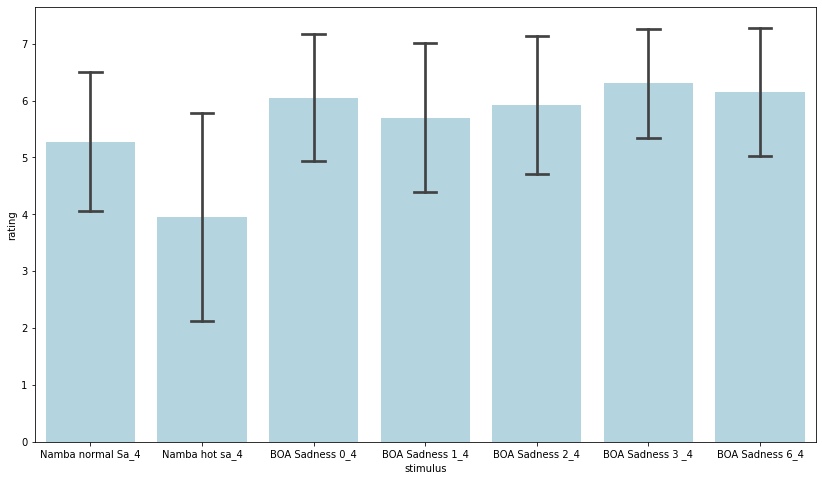

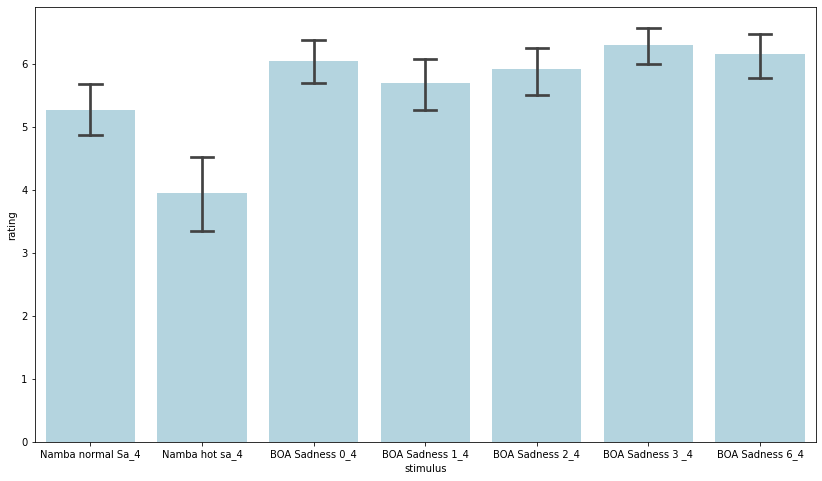

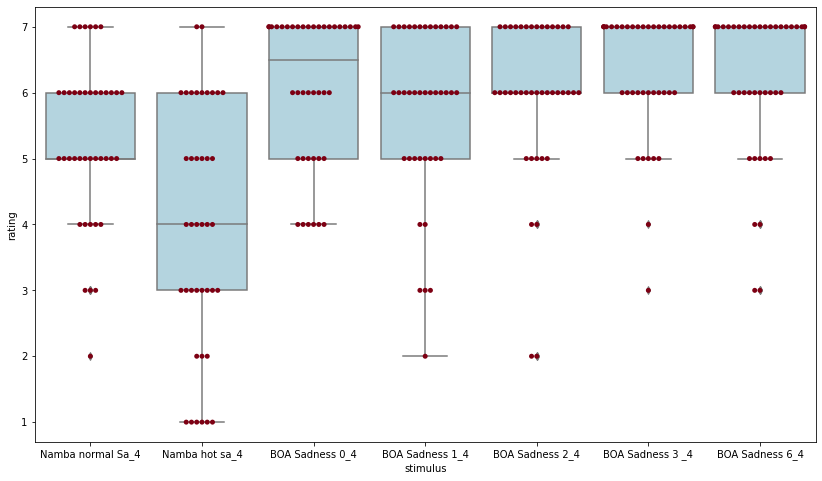

In [111]:
show_figure(4)

current emo is  surprise
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


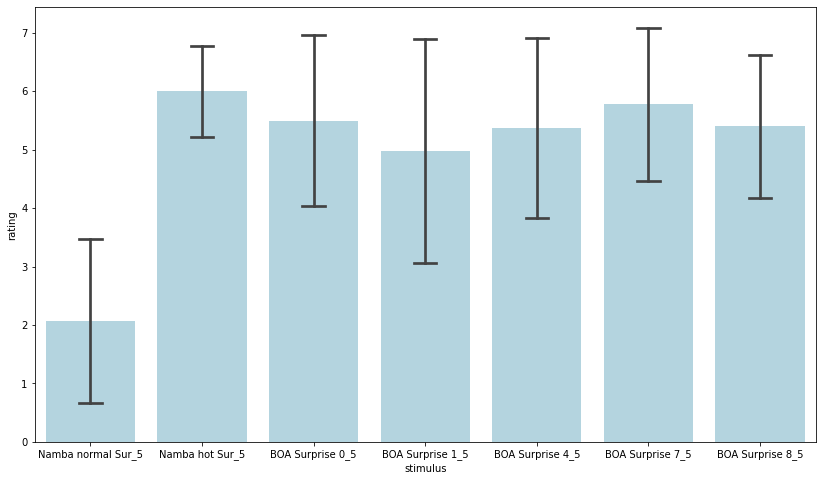

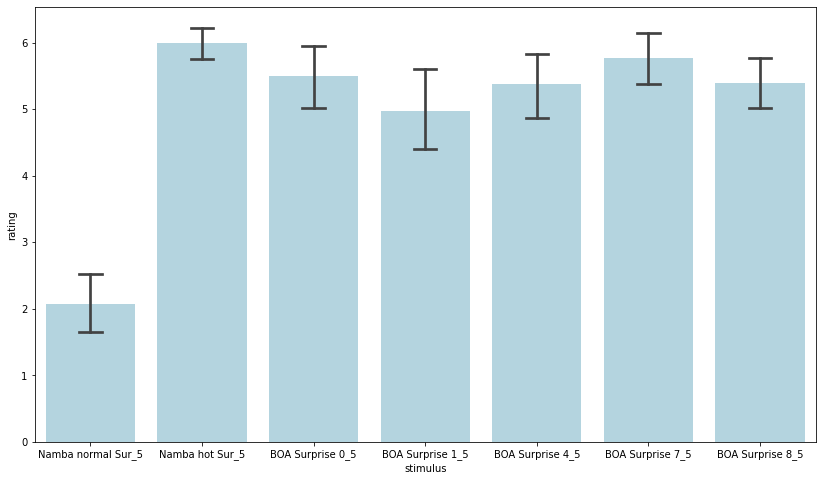

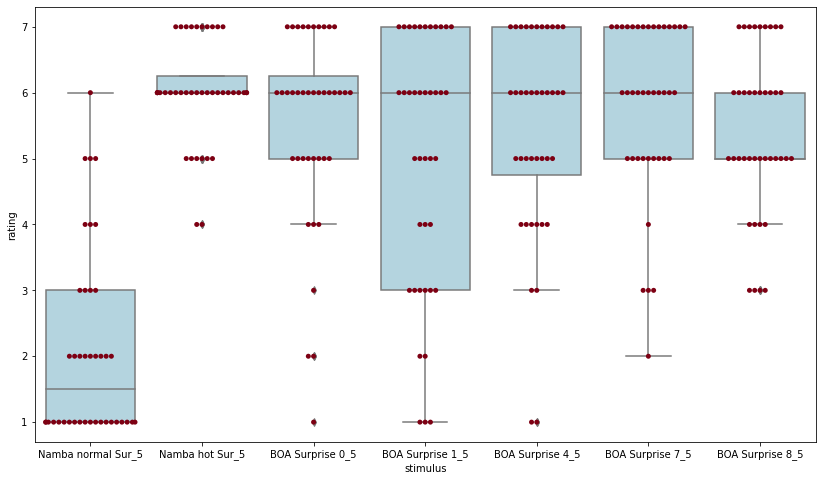

In [112]:
show_figure(5)

current emo is  neutral
error bar means standard deviation
error bar means 95% confidence interval


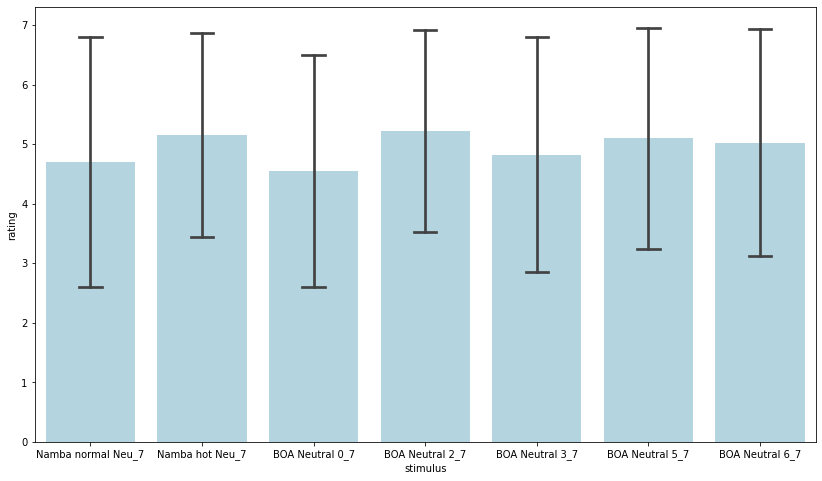

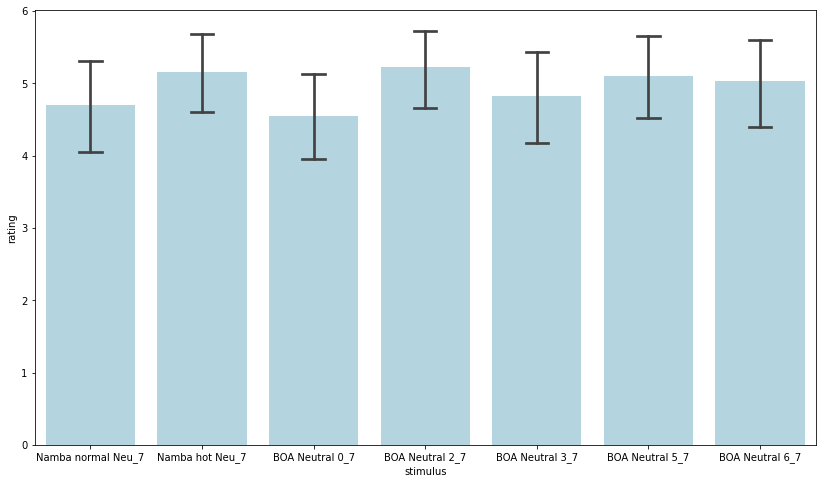

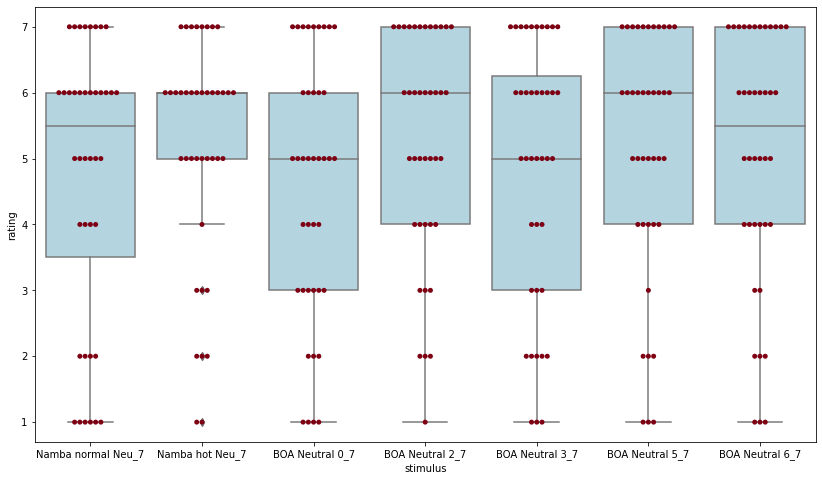

In [113]:
show_figure(6)

In [77]:
# show_figure(7)

In [ ]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data

anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# oneway ANOVA

In [10]:
anger_only_data = pd.read_csv('anger_only_data.csv')
# print(anger_only_data['Namba normal An_1'])
an_arr = anger_only_data.to_numpy()
# print(an_arr)
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(an_arr[0], an_arr[1], an_arr[2])
print("ANOVA F is:", fvalue, "\np value is:", pvalue)



ANOVA F is: 1.388888888888889 
p value is: 0.2980617117584766


# T-Test

In [ ]:
stats.ttest_1samp(a=)


In [11]:
# from statsmodels.stats.anova import AnovaRM

# #perform the repeated measures ANOVA
# print(AnovaRM(data=anger_only_data, depvar=[], subject=['id'], within=['anger']).fit())

In [77]:
practiceHA_data.mean(axis=0)

PracticeHA_1    1.675
PracticeHA_2    1.275
PracticeHA_3    5.425
PracticeHA_4    1.600
PracticeHA_5    1.350
PracticeHA_6    1.575
PracticeHA_7    2.450
dtype: float64